# Incidence

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from structure import Structure
import json
import matplotlib.patches as patches

In [2]:
plt.rcParams.update(
        {
            "font.size": 16,
            "axes.labelsize": 16,
            "axes.titlesize": 16,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            "legend.fontsize": 14,
            "font.family": "arial",
        }
    )

In [14]:
eps_prism =1.

payload = json.dumps({
    "ScenarioData": {
    "type": "Incident",
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 80.,
        "rotationZ": 40.,
    }
],
})
payload = json.loads(payload)

structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[1]

x_axis = np.round(np.degrees(structure.incident_angle), 1)
frequency = structure.frequency

layer.profile = layer.profile['transmitted']

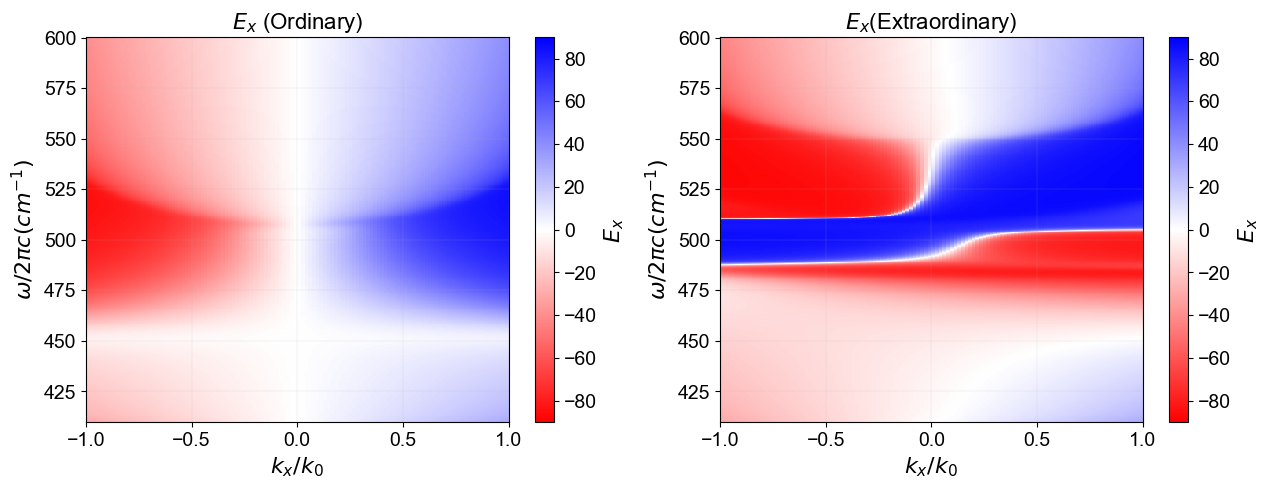

In [15]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), np.degrees(layer.profile['refraction_angle'][:,:,0]), cmap='bwr_r', vmax=90, vmin=-90)
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), np.degrees(layer.profile['refraction_angle'][:,:,1]), cmap='bwr_r',vmax=90, vmin=-90)
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ (Ordinary)')
axs[1].set_title(f'$E_x$(Extraordinary)')


plt.show()

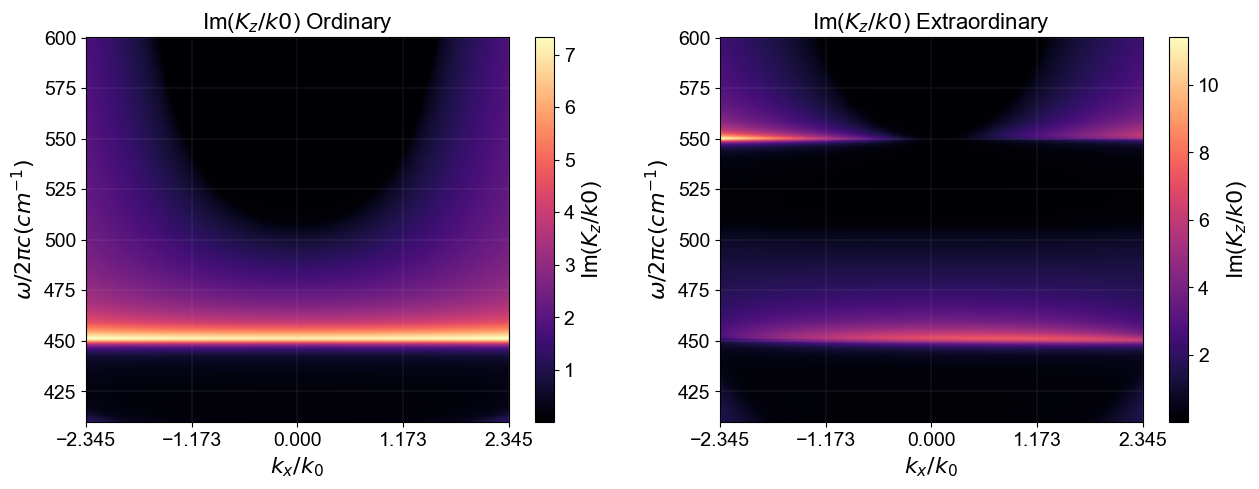

In [5]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Im($K_z/k0$)')
cbar2.set_label('Im($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Im($K_z/k0$) Ordinary')
axs[1].set_title(f'Im($K_z/k0$) Extraordinary')


plt.show()

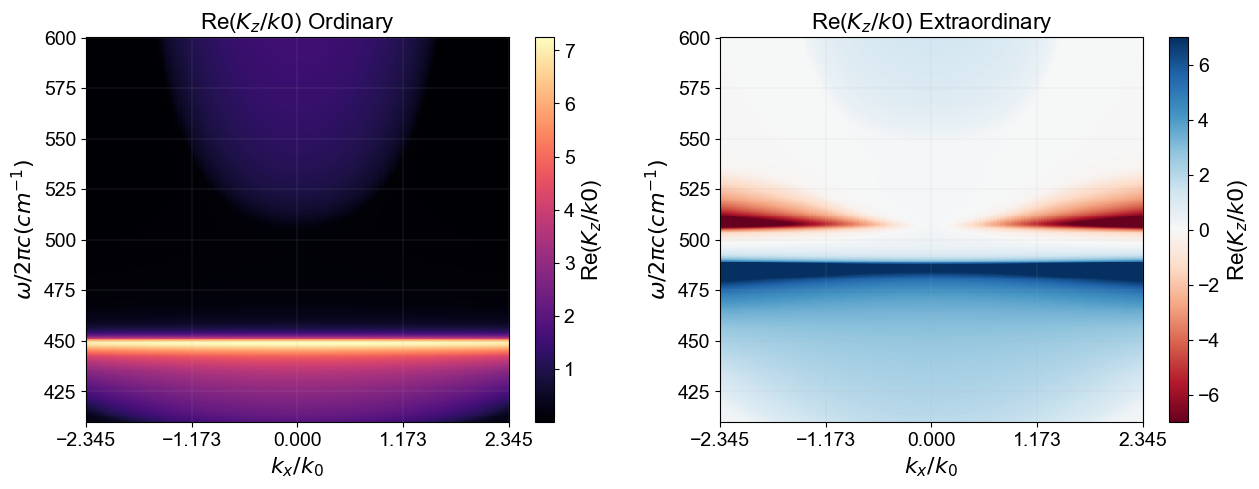

In [15]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='RdBu', vmin = -7, vmax = 7)
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Re($K_z/k0$)')
cbar2.set_label('Re($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Re($K_z/k0$) Ordinary')
axs[1].set_title(f'Re($K_z/k0$) Extraordinary')


plt.show()

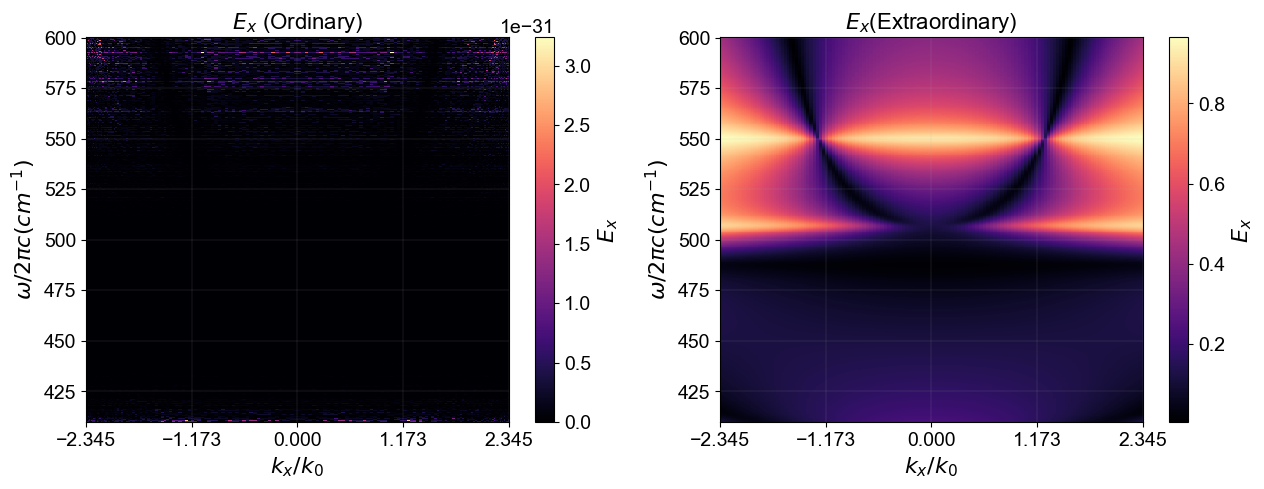

In [9]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ (Ordinary)')
axs[1].set_title(f'$E_x$(Extraordinary)')


plt.show()

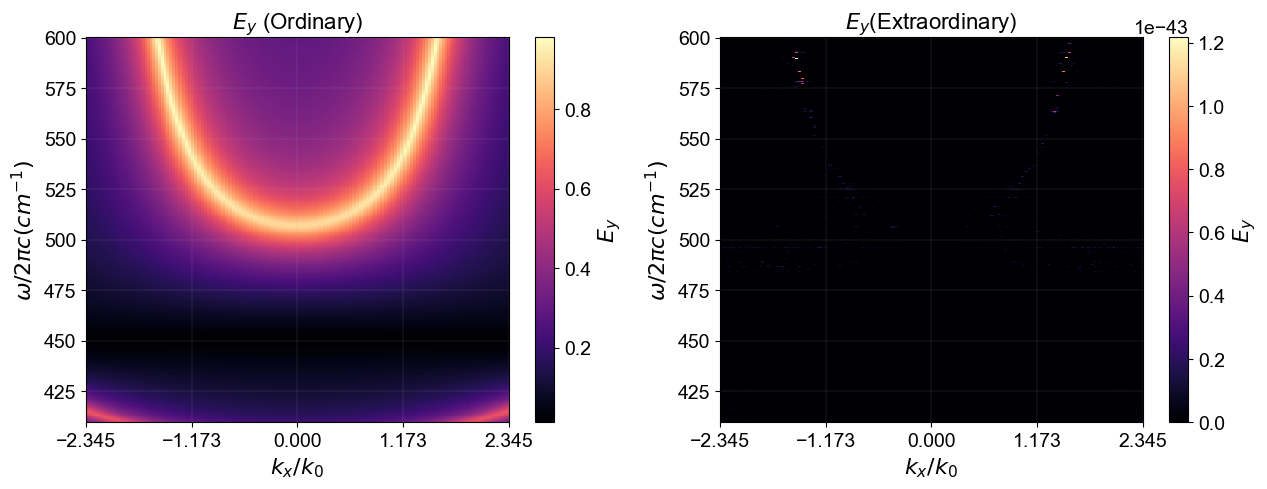

In [10]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_y$')
cbar2.set_label('$E_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_y$ (Ordinary)')
axs[1].set_title(f'$E_y$(Extraordinary)')


plt.show()

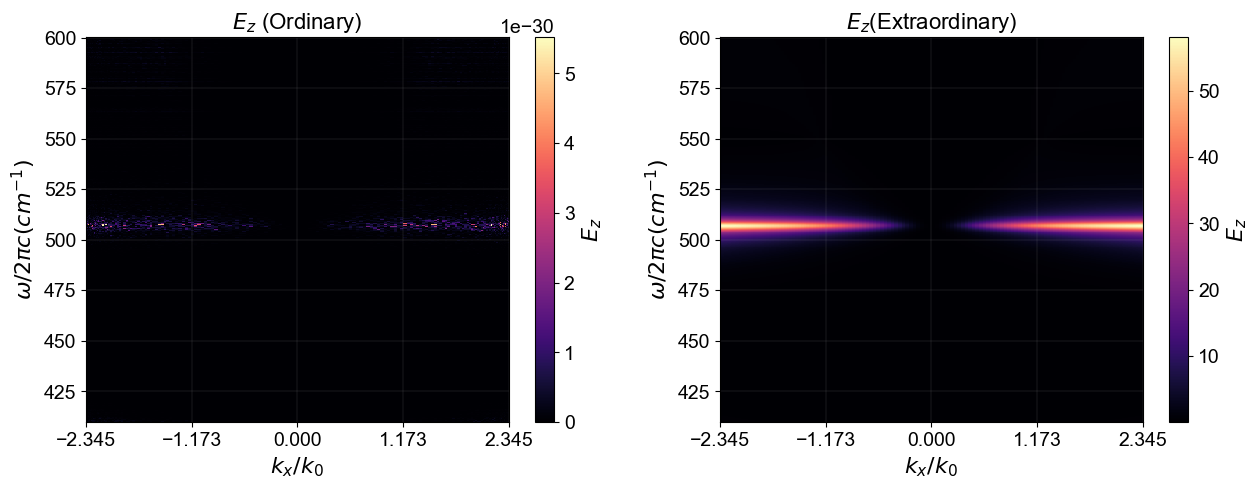

In [11]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_z$')
cbar2.set_label('$E_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_z$ (Ordinary)')
axs[1].set_title(f'$E_z$(Extraordinary)')


plt.show()

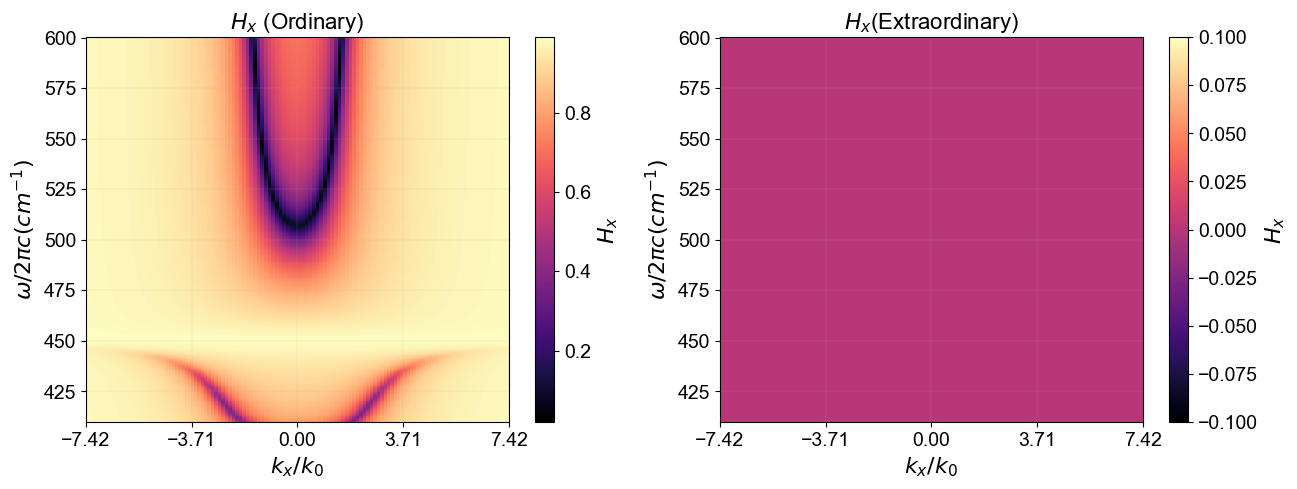

In [23]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_x$')
cbar2.set_label('$H_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_x$ (Ordinary)')
axs[1].set_title(f'$H_x$(Extraordinary)')


plt.show()

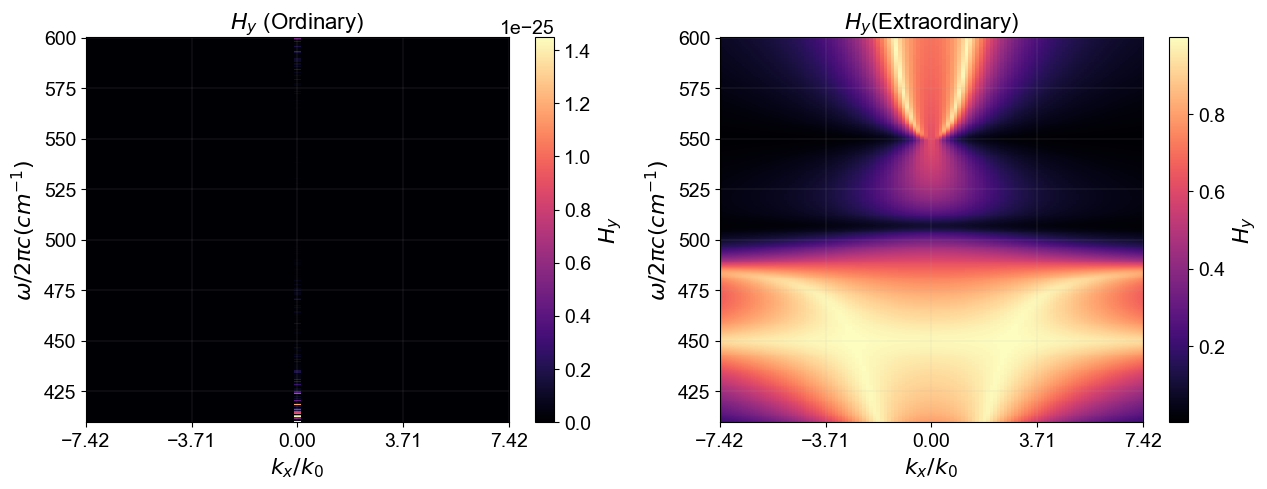

In [24]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_y$')
cbar2.set_label('$H_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_y$ (Ordinary)')
axs[1].set_title(f'$H_y$(Extraordinary)')


plt.show()

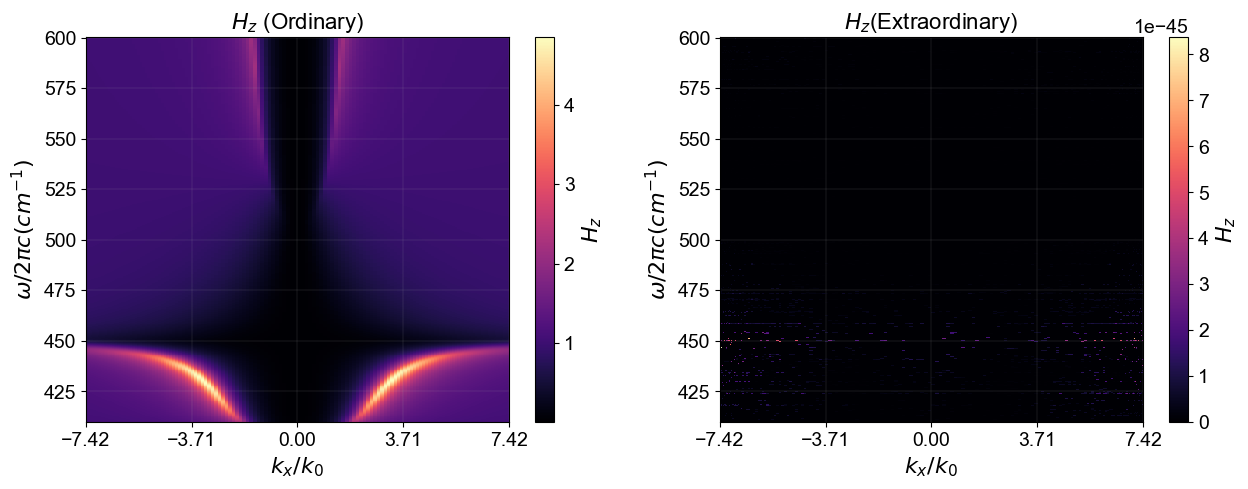

In [25]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_z$')
cbar2.set_label('$H_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_z$ (Ordinary)')
axs[1].set_title(f'$H_z$(Extraordinary)')


plt.show()

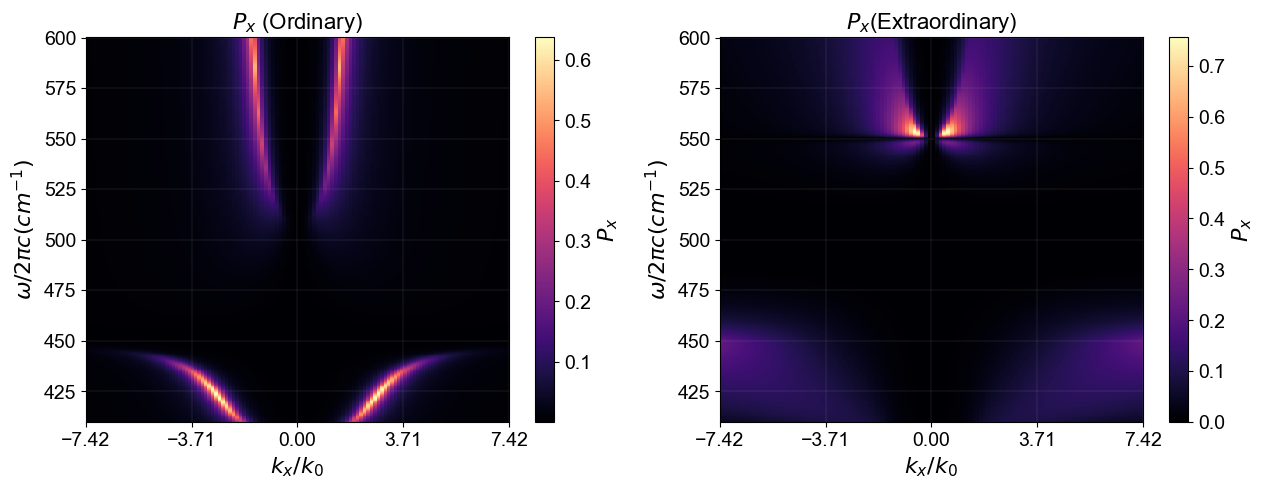

In [26]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_x$')
cbar2.set_label('$P_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_x$ (Ordinary)')
axs[1].set_title(f'$P_x$(Extraordinary)')


plt.show()

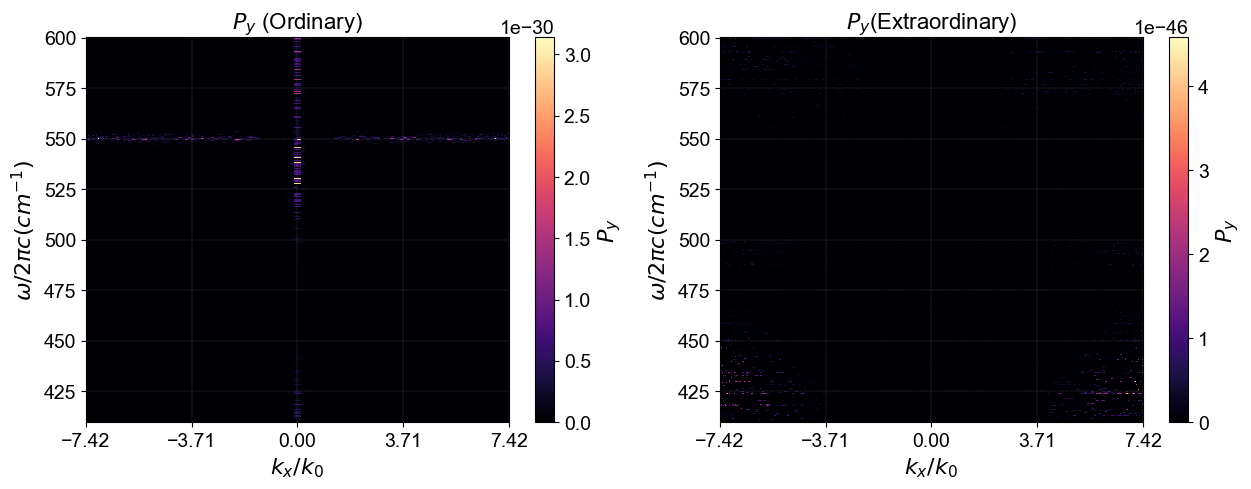

In [27]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_y$')
cbar2.set_label('$P_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_y$ (Ordinary)')
axs[1].set_title(f'$P_y$(Extraordinary)')


plt.show()

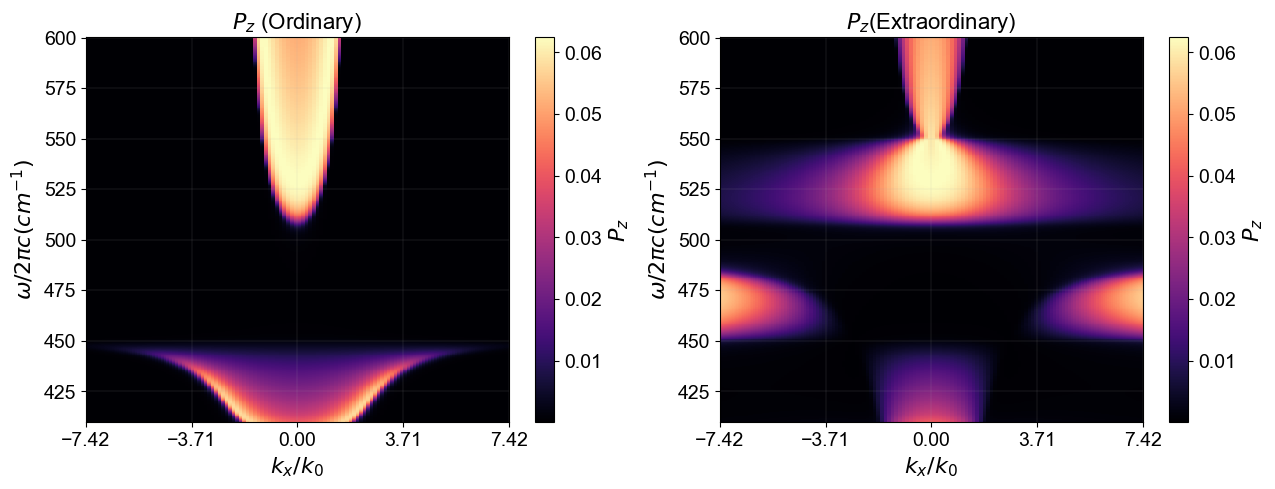

In [28]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = (tf.math.sin(structure.incident_angle) * tf.cast(tf.math.sqrt(eps_prism), dtype=tf.float64)).numpy()
x_label = r'$k_x/k_0$'

y_label = "$\omega/2\pi c (cm^{-1})$"
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_z$')
cbar2.set_label('$P_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ (Ordinary)')
axs[1].set_title(f'$P_z$(Extraordinary)')


plt.show()

# Azimuthal Rotation

In [3]:
payload = json.dumps({
    "ScenarioData": {
    "type": "Azimuthal",
    "incidentAngle": 90,
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": 50.
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 90.,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [4]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[1]
layer.profile = layer.profile['transmitted']

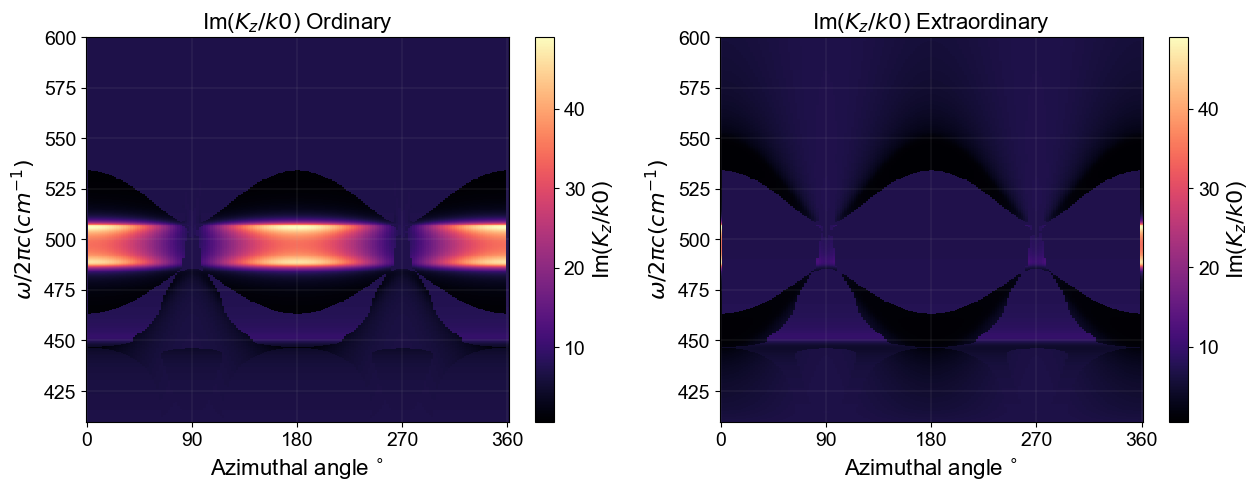

In [5]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Im($K_z/k0$)')
cbar2.set_label('Im($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Im($K_z/k0$) Ordinary')
axs[1].set_title(f'Im($K_z/k0$) Extraordinary')


plt.show()

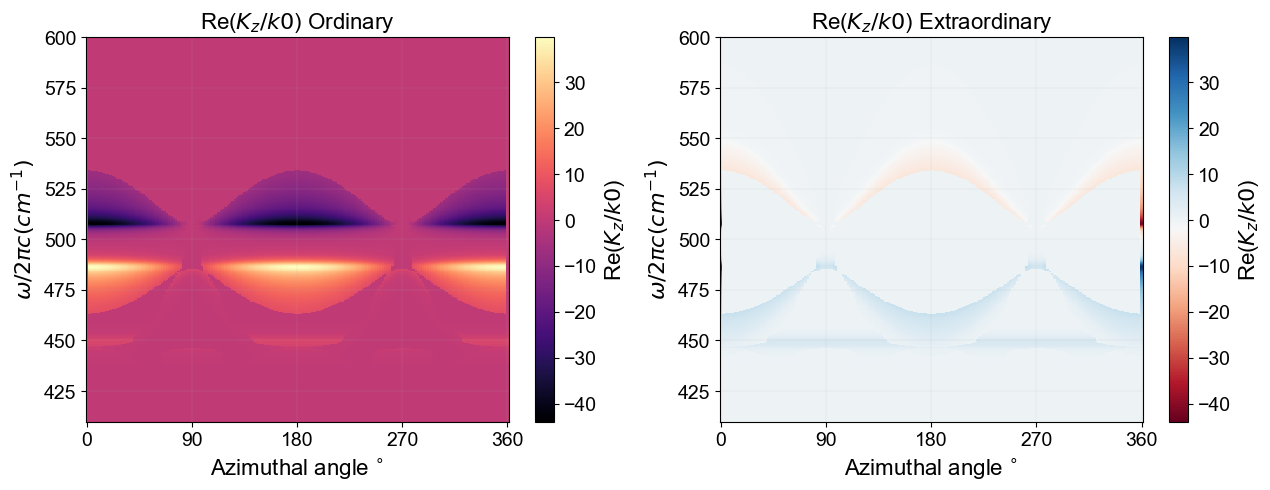

In [6]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='RdBu')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('Re($K_z/k0$)')
cbar2.set_label('Re($K_z/k0$)')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('Re($K_z/k0$) Ordinary')
axs[1].set_title(f'Re($K_z/k0$) Extraordinary')


plt.show()

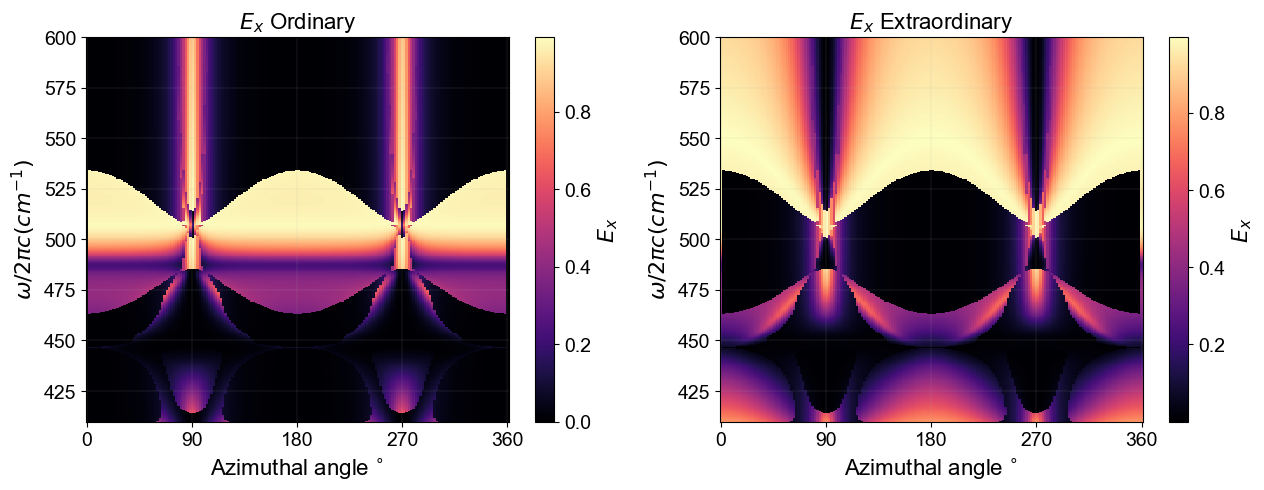

In [7]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ex'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_x$')
cbar2.set_label('$E_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_x$ Ordinary')
axs[1].set_title(f'$E_x$ Extraordinary')


plt.show()

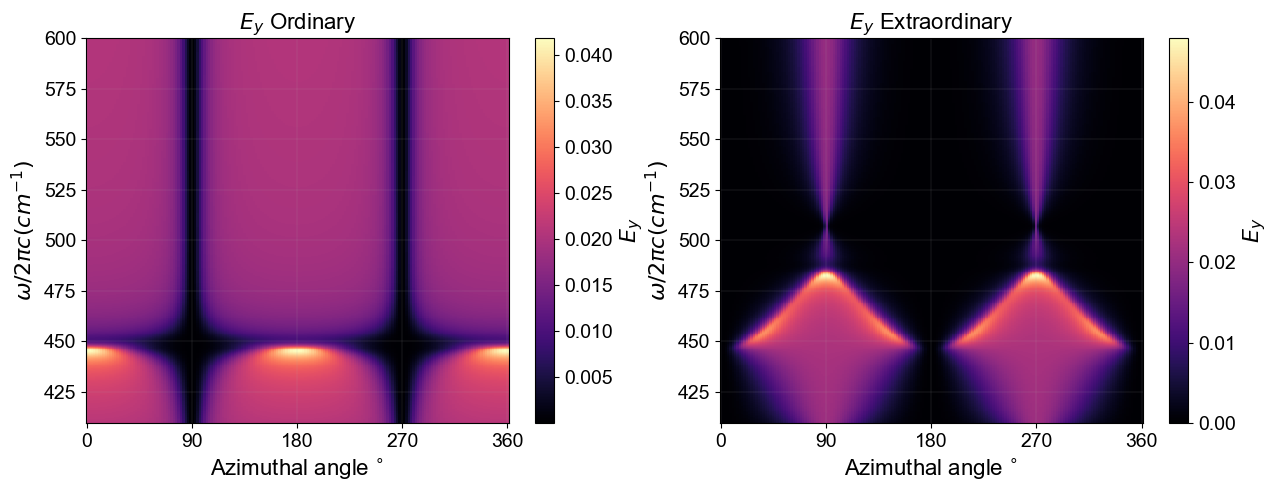

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ey'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_y$')
cbar2.set_label('$E_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_y$ Ordinary')
axs[1].set_title(f'$E_y$ Extraordinary')


plt.show()

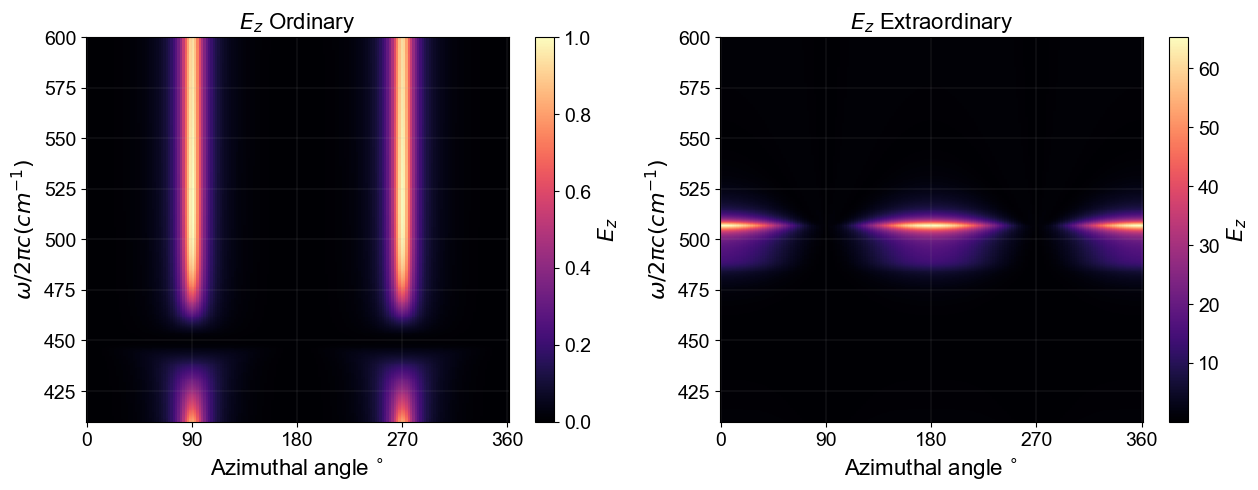

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Ez'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$E_z$')
cbar2.set_label('$E_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$E_z$ Ordinary')
axs[1].set_title(f'$E_z$ Extraordinary')


plt.show()

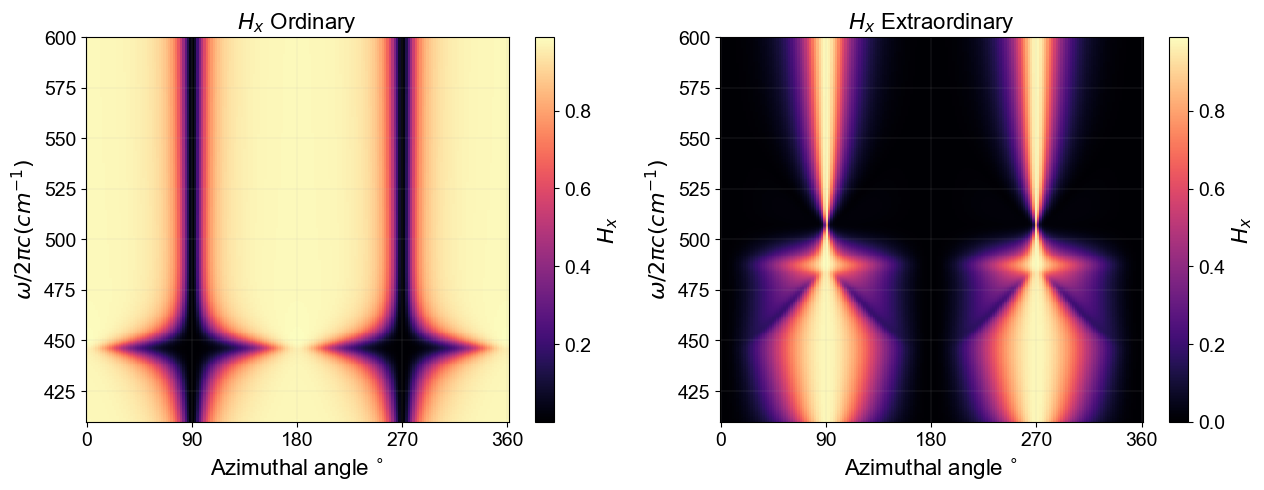

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hx'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_x$')
cbar2.set_label('$H_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_x$ Ordinary')
axs[1].set_title(f'$H_x$ Extraordinary')


plt.show()

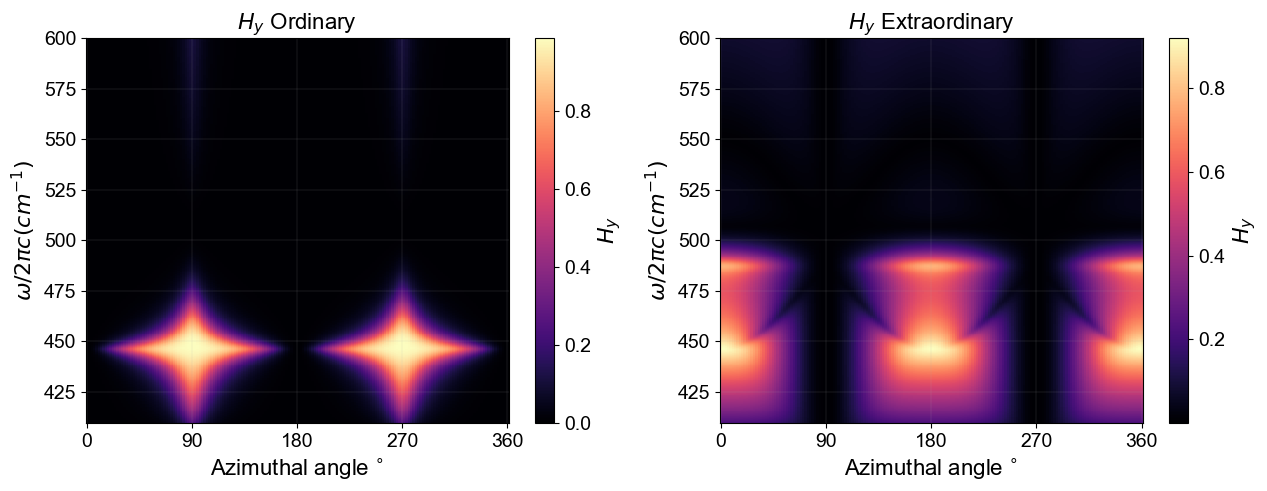

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hy'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_y$')
cbar2.set_label('$H_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_y$ Ordinary')
axs[1].set_title(f'$H_y$ Extraordinary')


plt.show()

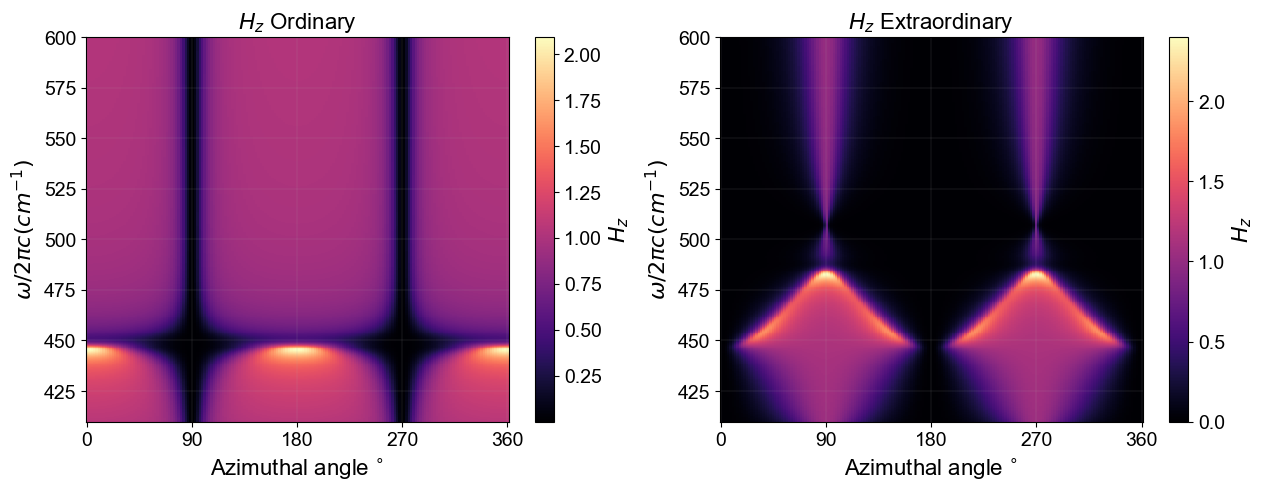

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Hz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$H_z$')
cbar2.set_label('$H_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$H_z$ Ordinary')
axs[1].set_title(f'$H_z$ Extraordinary')


plt.show()

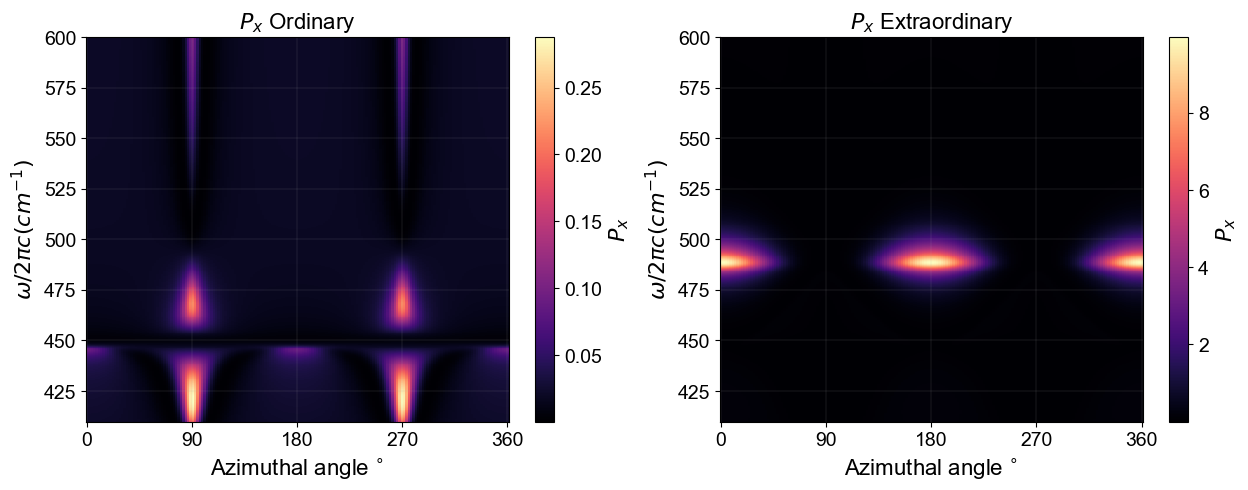

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Px'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_x$')
cbar2.set_label('$P_x$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_x$ Ordinary')
axs[1].set_title(f'$P_x$ Extraordinary')


plt.show()

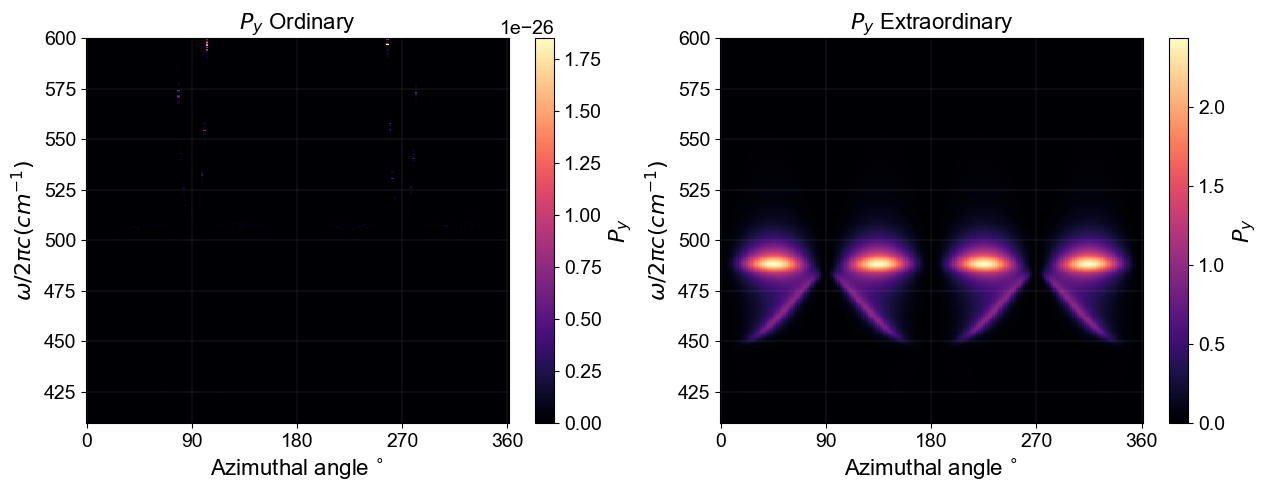

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Py'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_y$')
cbar2.set_label('$P_y$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_y$ Ordinary')
axs[1].set_title(f'$P_y$ Extraordinary')


plt.show()

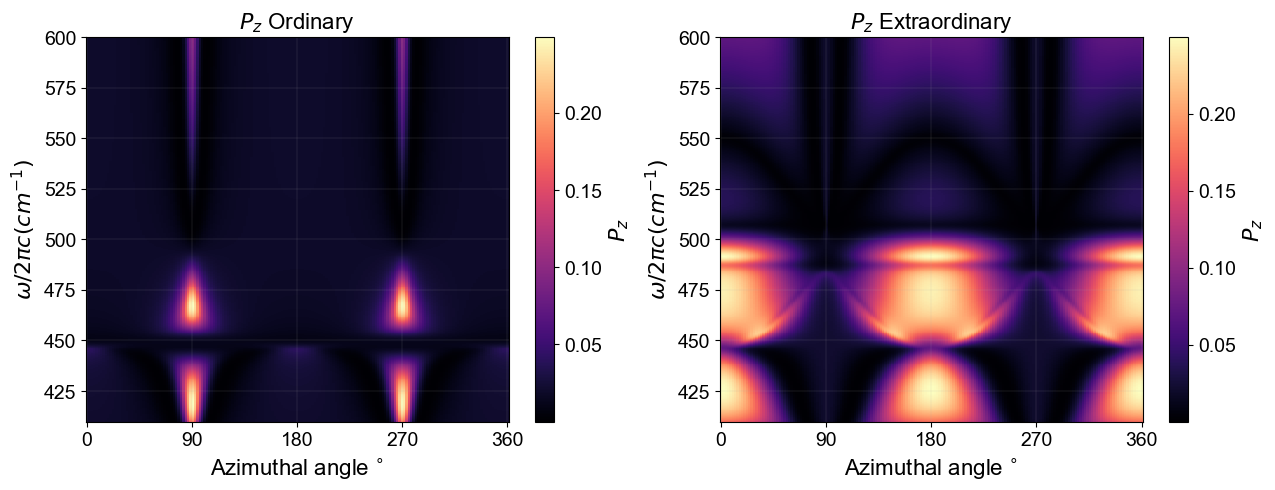

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (15,5))

x_axis = np.round(np.degrees(structure.azimuthal_angle), 1)
x_label = r'Azimuthal angle $^{\circ}$'

y_label = "$\omega/2\pi c (cm^{-1})$"
frequency = structure.frequency
  
im1 = axs[0].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,0])**2., cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(x_axis), tf.math.real(frequency), tf.math.abs(layer.profile['Pz'][:,:,1])**2., cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0])
cbar2 = plt.colorbar(im2, ax=axs[1])
cbar1.set_label('$P_z$')
cbar2.set_label('$P_z$')
axs[0].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[1].set_xticks(np.linspace(x_axis.min(), x_axis.max(), 5))
axs[0].grid(linewidth=0.1)
axs[1].grid(linewidth=0.1)
axs[0].set_xlabel(x_label)
axs[1].set_xlabel(x_label)
axs[0].set_ylabel(y_label)
axs[1].set_ylabel(y_label)

axs[0].set_title('$P_z$ Ordinary')
axs[1].set_title(f'$P_z$ Extraordinary')


plt.show()

# Dispersion

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from structure import Structure
import json
import matplotlib.patches as patches
plt.rcParams.update(
        {
            "font.size": 16,
            "axes.labelsize": 16,
            "axes.titlesize": 16,
            "xtick.labelsize": 14,
            "ytick.labelsize": 14,
            "legend.fontsize": 14,
            "font.family": "arial",
        }
    )

In [10]:
eps_prism = 1.
payload = json.dumps({
    "ScenarioData": {
    "type": "Dispersion",
    "frequency": 460,
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 90.,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[-1]
layer.profile = layer.profile['transmitted']

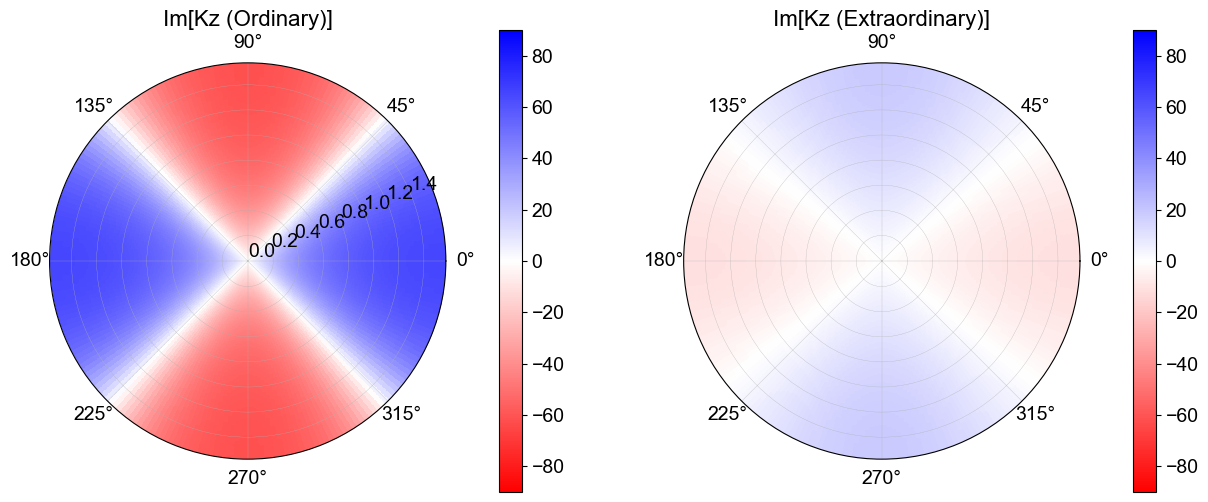

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([3.80694636, 0.11975115])>

In [11]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), np.degrees(layer.profile['refraction_angle'][:,:,0]), cmap='bwr_r', vmin=-90, vmax=90)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), np.degrees(layer.profile['refraction_angle'][:,:,1]), cmap='bwr_r',vmin=-90, vmax=90)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[1].set_yticklabels([])
axs[0].set_title('Im[Kz (Ordinary)]')
axs[1].set_title('Im[Kz (Extraordinary)]')
plt.show()

tf.math.imag(layer.profile['propagation'][0,80])

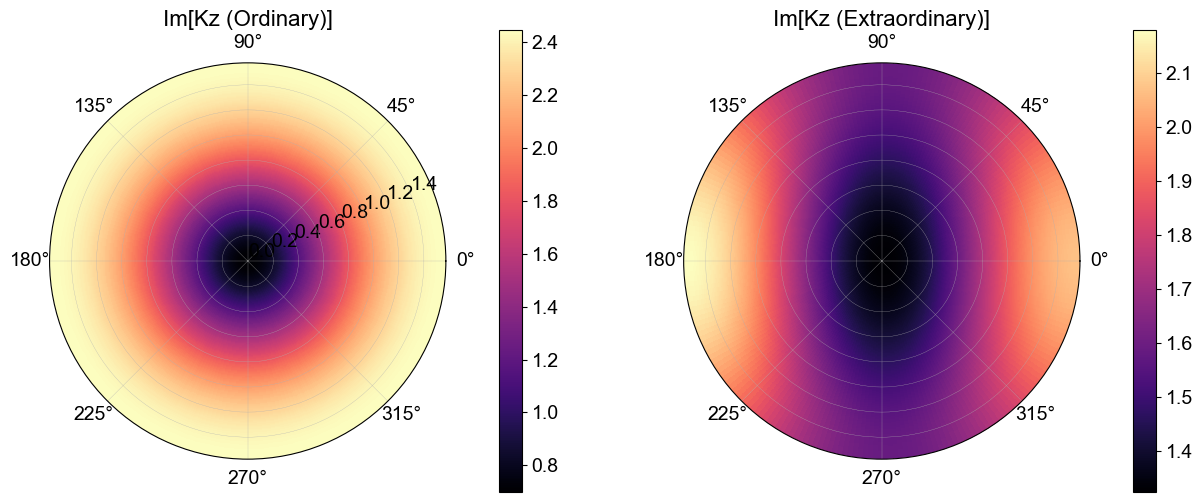

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([0.69946159, 1.32440822])>

In [33]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.imag(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.imag(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[1].set_yticklabels([])
axs[0].set_title('Im[Kz (Ordinary)]')
axs[1].set_title('Im[Kz (Extraordinary)]')
plt.show()

tf.math.imag(layer.profile['propagation'][0,80])

Text(0.5, 1.0, 'Re[Kz (Extraordinary)]')

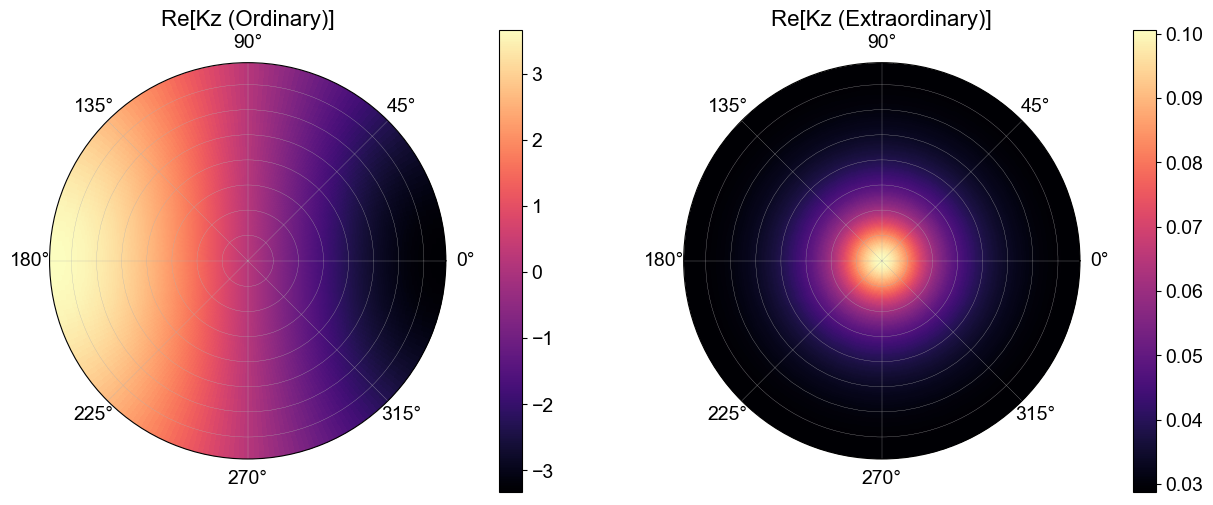

In [5]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile['propagation'][:,:,0]), cmap='magma')
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.real(layer.profile['propagation'][:,:,1]), cmap='magma')
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.1)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.1)
axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title('Re[Kz (Ordinary)]')
axs[1].set_title('Re[Kz (Extraordinary)]')

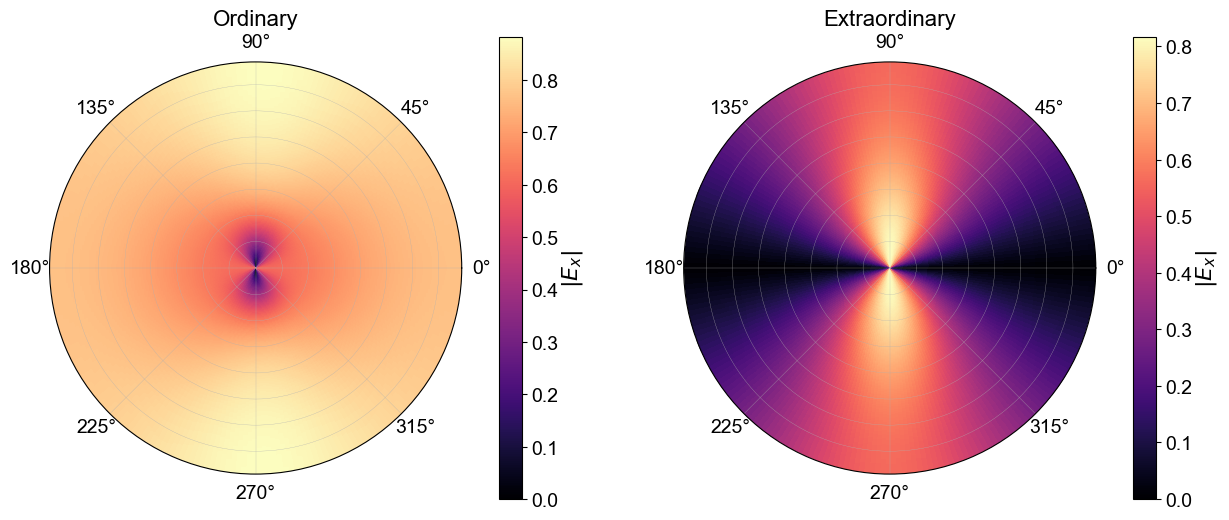

In [6]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ex'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ex'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|E_x|$', labelpad=1)
cbar2.set_label(r'$|E_x|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

plt.show()

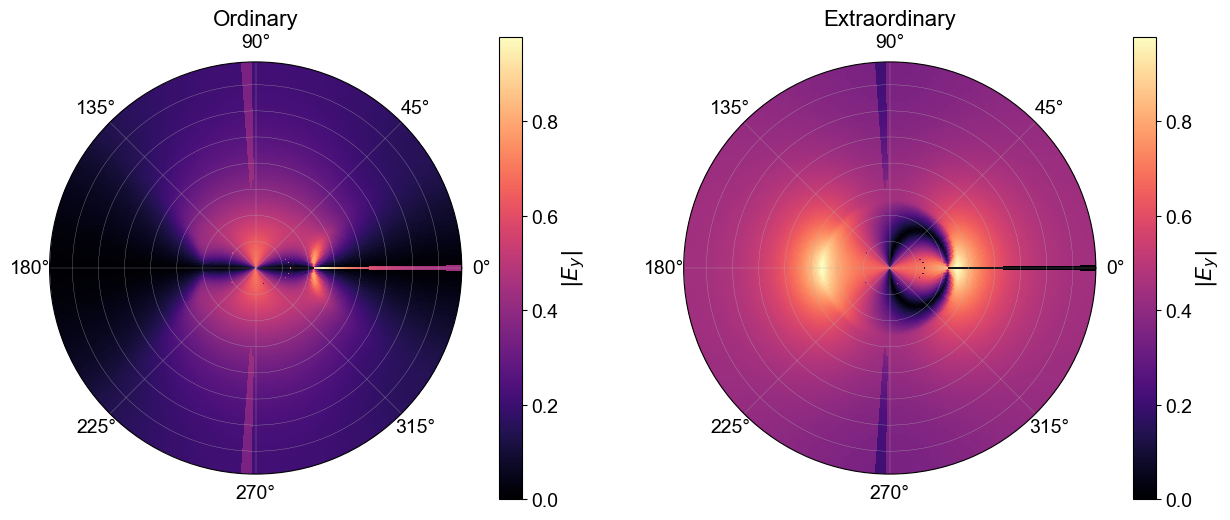

In [ ]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ey'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ey'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|E_y|$', labelpad=1)
cbar2.set_label(r'$|E_y|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')
plt.show()

Text(0.5, 1.0, 'Extraordinary')

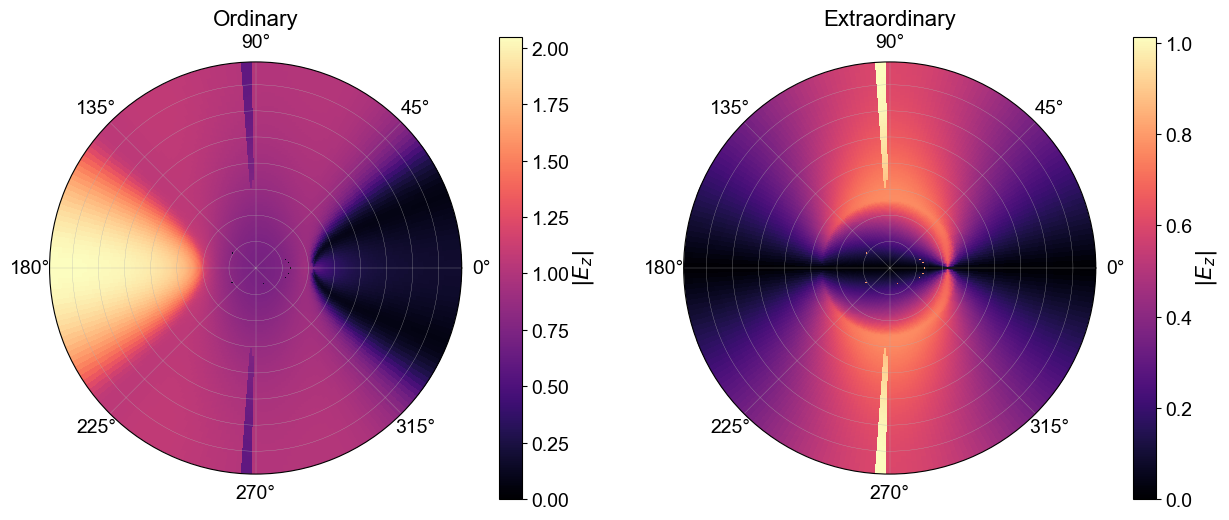

In [12]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ez'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Ez'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|E_z|$', labelpad=1)
cbar2.set_label(r'$|E_z|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

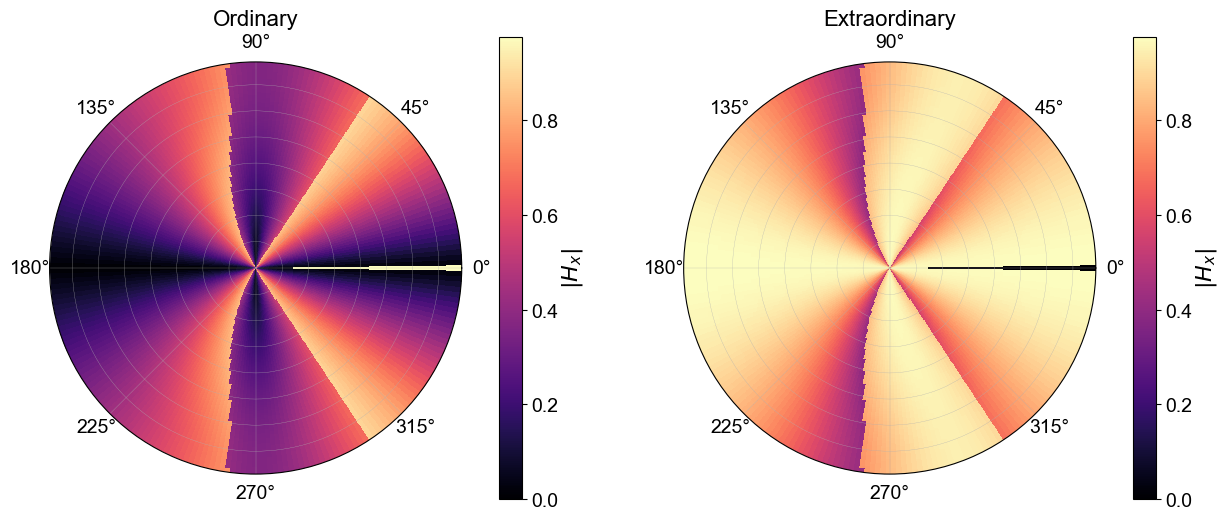

In [11]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hx'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hx'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|H_x|$', labelpad=1)
cbar2.set_label(r'$|H_x|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

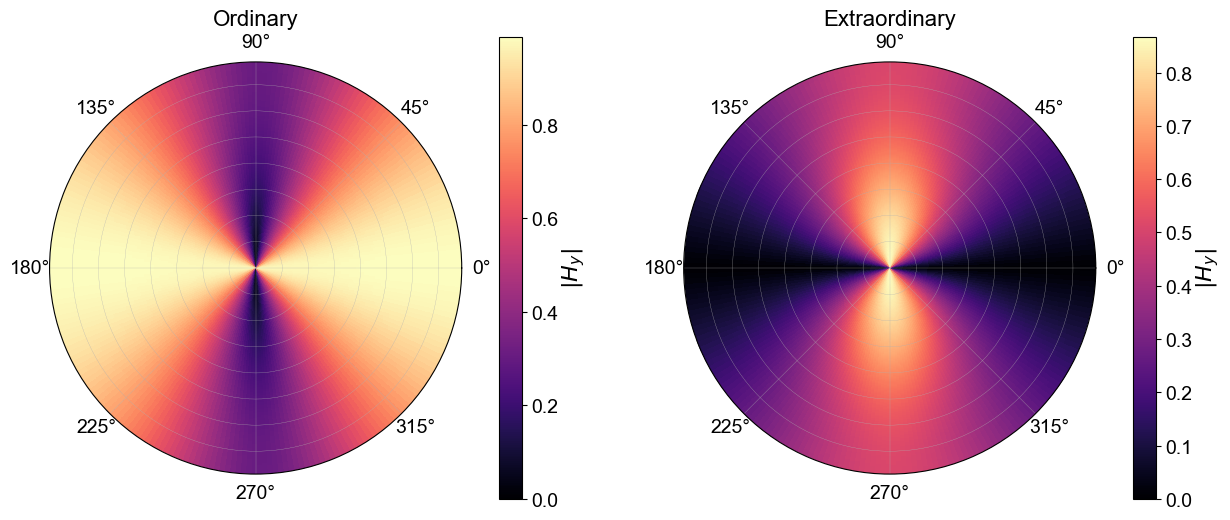

In [13]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hy'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hy'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|H_y|$', labelpad=1)
cbar2.set_label(r'$|H_y|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

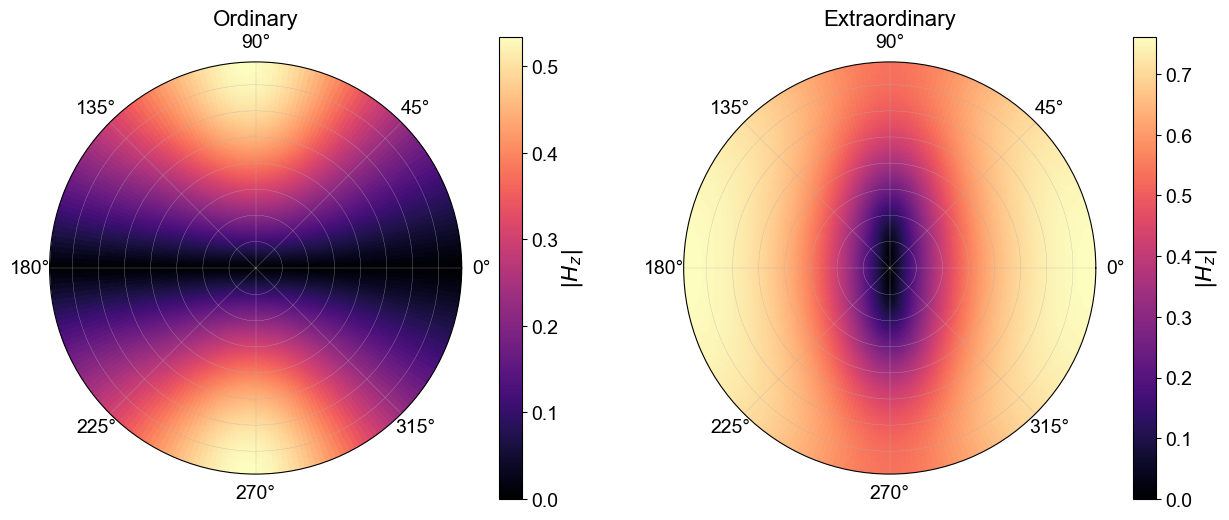

In [14]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hz'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Hz'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|H_z|$', labelpad=1)
cbar2.set_label(r'$|H_z|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

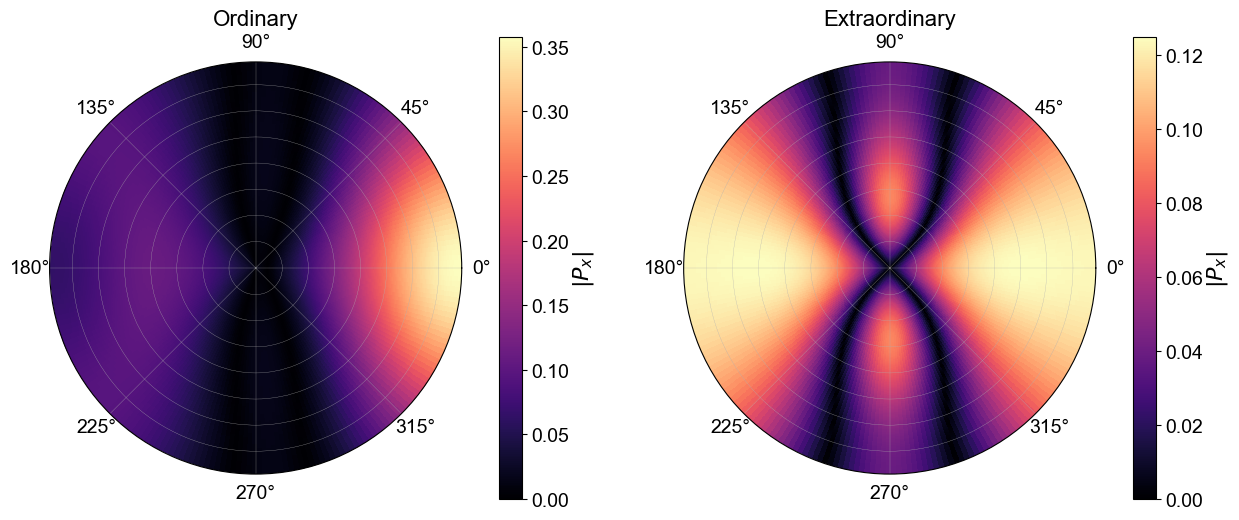

In [15]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Px'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Px'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|P_x|$', labelpad=1)
cbar2.set_label(r'$|P_x|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

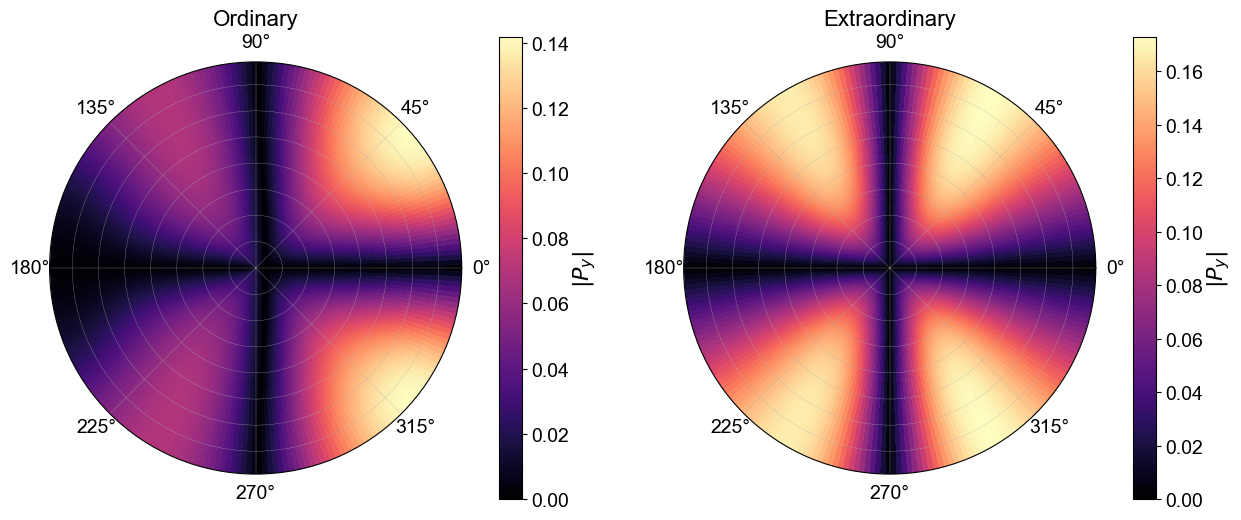

In [16]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Py'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Py'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|P_y|$', labelpad=1)
cbar2.set_label(r'$|P_y|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

Text(0.5, 1.0, 'Extraordinary')

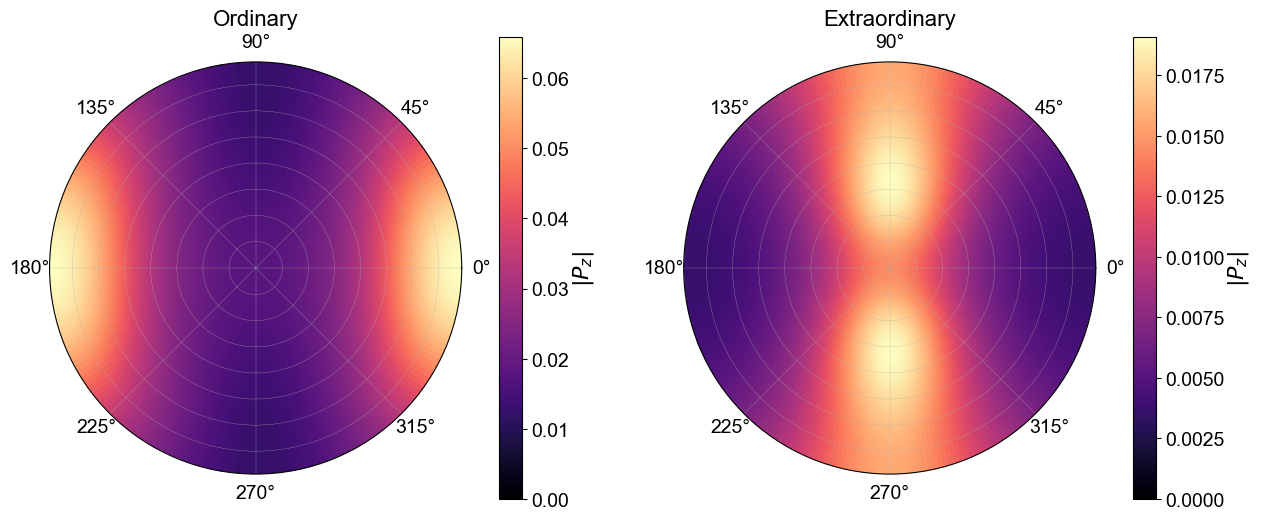

In [17]:
fig, axs = plt.subplots(
      1,2, figsize = (15,15), subplot_kw= dict(projection = 'polar')
  )
im1 = axs[0].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Pz'][:,:,0])**2.), cmap='magma', vmin=0.)
im2 = axs[1].pcolormesh(tf.math.real(structure.azimuthal_angle), tf.math.real(structure.incident_angle), tf.math.sqrt(tf.math.abs(layer.profile['Pz'][:,:,1])**2.), cmap='magma', vmin=0.)
cbar1 = plt.colorbar(im1, ax=axs[0], shrink=0.4, pad = 0.07)
cbar2 = plt.colorbar(im2, ax=axs[1], shrink=0.4, pad =0.07)

cbar1.set_label(r'$|P_z|$', labelpad=1)
cbar2.set_label(r'$|P_z|$', labelpad=1)

axs[0].grid(linewidth=0.2)
axs[1].grid(linewidth=0.2)
axs[0].set_yticklabels([])
axs[1].set_yticklabels([])
axs[0].set_title(r'Ordinary')
axs[1].set_title(r'Extraordinary')

# Hyperbolic Dispersion Curves

In [ ]:
eps_prism = 50.

payload = json.dumps({
    "ScenarioData": {
    "type": "Dispersion",
    "frequency": 460
},
"Layers": [
    {
        "type": "Ambient Incident Layer",
        "permittivity": eps_prism
    },
    {
        "type": "Semi Infinite Anisotropic Layer",
        "material": "Quartz",
        "rotationX": 0,
        "rotationY": 0,
        "rotationZ": 0,
    }
],
})
payload = json.loads(payload)

In [ ]:
structure = Structure()
structure.get_scenario(payload.get('ScenarioData'))
structure.get_layers(payload.get("Layers", None))
layer = structure.layers[-1]
transmitted = layer.profile['transmitted']['propagation']
reflected = layer.profile['reflected']['propagation']

In [ ]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib import cm

Text(0.5, 0, '$Re[k_z/k_0]$')

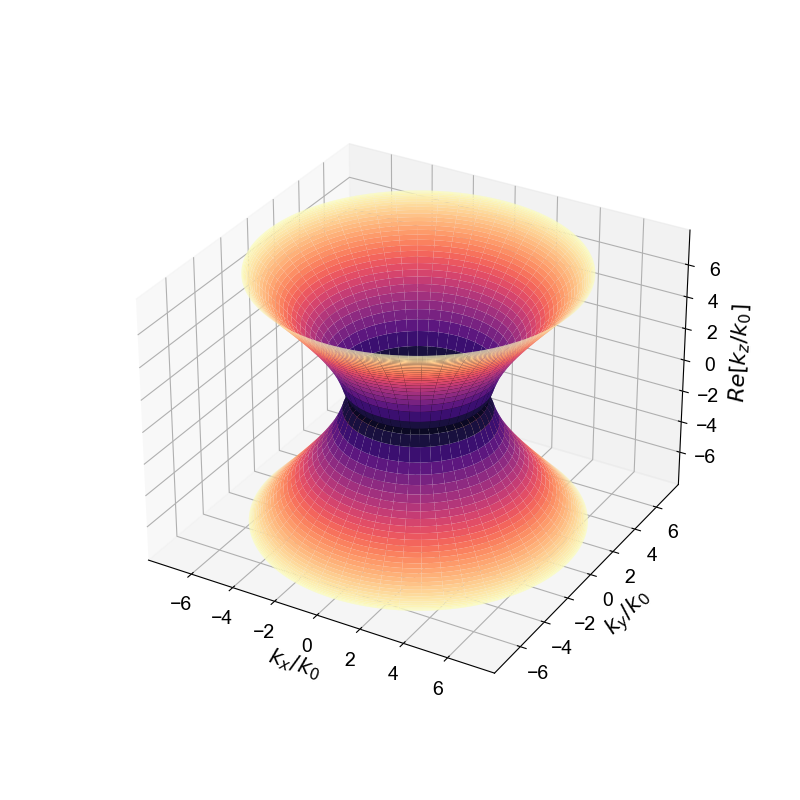

In [ ]:
# Create a meshgrid of the azimuthal and incident angles
azimuthal_angles, incident_angles = np.meshgrid(structure.azimuthal_angle, structure.incident_angle)

# Convert to Cartesian coordinates for plotting
X = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.cos(azimuthal_angles)
Y = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.sin(azimuthal_angles)

# Your Z data; for example, transmitted[:,:,1]
Z_transmitted = tf.math.real(transmitted[:,:,1])
Z_reflected = tf.math.real(reflected[:,:,1])

# Plot the surface
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_transmitted, cmap= cm.magma_r)  # Transmitted surface
ax.plot_surface(X, Y, Z_reflected, cmap= cm.magma)    # Reflected surface

# Labels
ax.set_xlabel(r'$k_x/k_0$')
ax.set_ylabel(r'$k_y/k_0$')
ax.set_zlabel(r'$Re[k_z/k_0]$')


Text(0.5, 0, '$Imag[k_z/k_0]$')

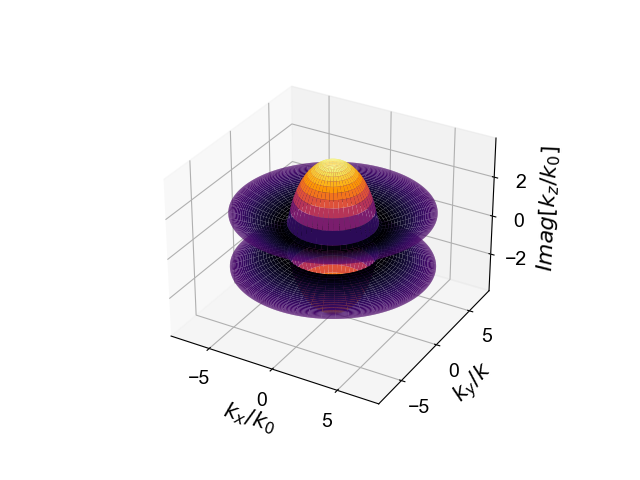

In [ ]:
# Create a meshgrid of the azimuthal and incident angles
azimuthal_angles, incident_angles = np.meshgrid(structure.azimuthal_angle, structure.incident_angle)

# Convert to Cartesian coordinates for plotting
X = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.cos(azimuthal_angles)
Y = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.sin(azimuthal_angles)

# Your Z data; for example, transmitted[:,:,1]
Z_transmitted = tf.math.imag(transmitted[:,:,1])
Z_reflected = tf.math.imag(reflected[:,:,1])

# Plot the surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_transmitted, cmap= cm.inferno)  # Transmitted surface
ax.plot_surface(X, Y, Z_reflected, cmap= cm.inferno_r)    # Reflected surface

# Labels
ax.set_xlabel(r'$k_x/k_0$')
ax.set_ylabel(r'$k_y/k$')
ax.set_zlabel(r'$Imag[k_z/k_0]$')


Text(0.5, 0, '$Re[k_z/k_0]$')

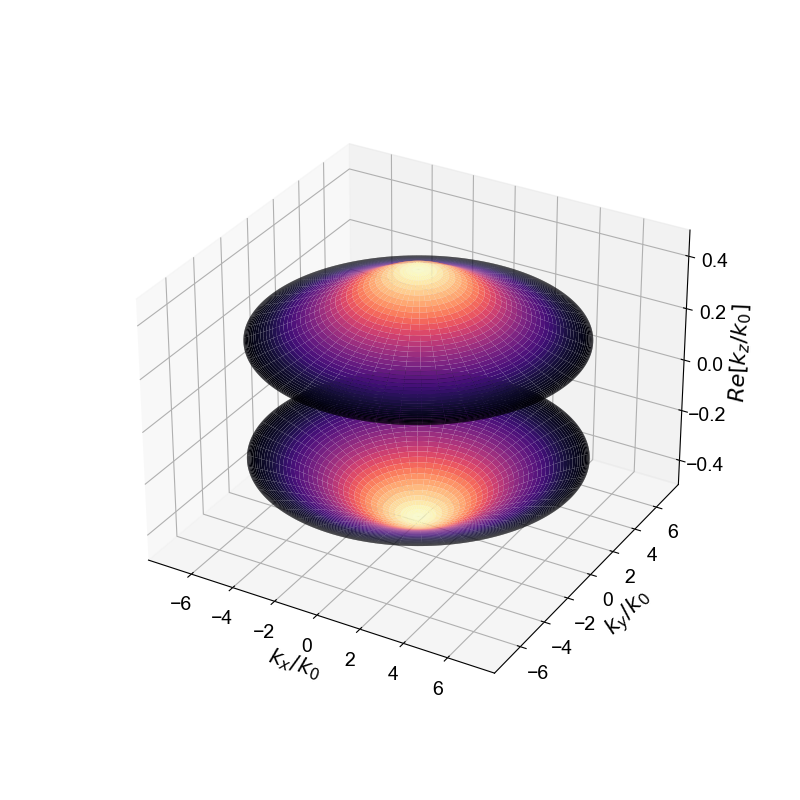

In [ ]:
# Create a meshgrid of the azimuthal and incident angles
azimuthal_angles, incident_angles = np.meshgrid(structure.azimuthal_angle, structure.incident_angle)

# Convert to Cartesian coordinates for plotting
X = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.cos(azimuthal_angles)
Y = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.sin(azimuthal_angles)

# Your Z data; for example, transmitted[:,:,1]
Z_transmitted = tf.math.real(transmitted[:,:,0])
Z_reflected = tf.math.real(reflected[:,:,0])

# Plot the surface
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_transmitted, cmap= cm.magma)  # Transmitted surface
ax.plot_surface(X, Y, Z_reflected, cmap= cm.magma_r)    # Reflected surface

# Labels
ax.set_xlabel(r'$k_x/k_0$')
ax.set_ylabel(r'$k_y/k_0$')
ax.set_zlabel(r'$Re[k_z/k_0]$')

Text(0.5, 0, '$Imag[k_z/k_0]$')

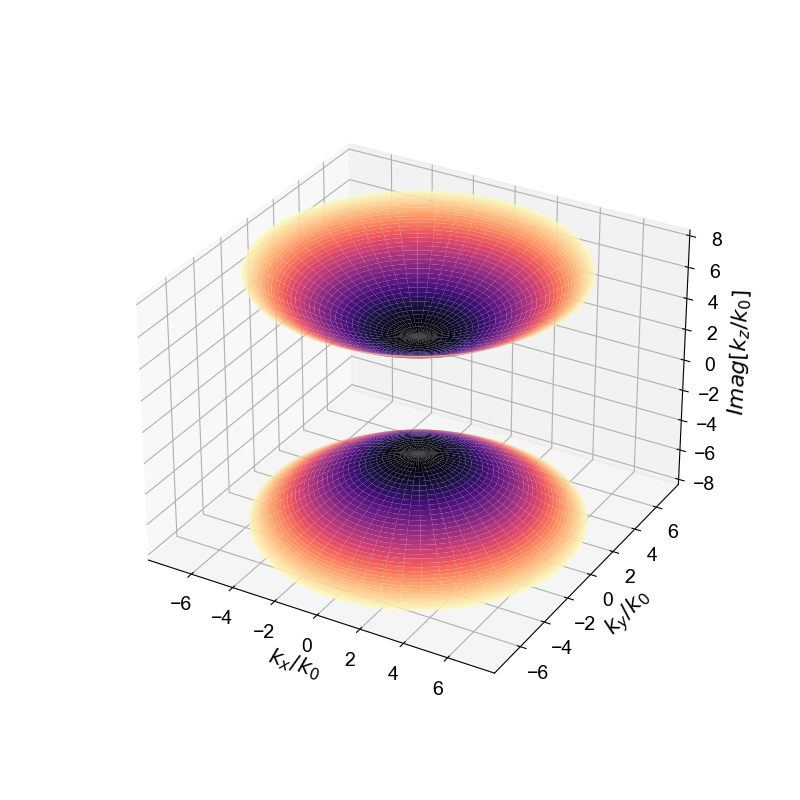

In [ ]:
# Create a meshgrid of the azimuthal and incident angles
azimuthal_angles, incident_angles = np.meshgrid(structure.azimuthal_angle, structure.incident_angle)

# Convert to Cartesian coordinates for plotting
X = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.cos(azimuthal_angles)
Y = tf.sqrt(eps_prism) * np.sin(incident_angles) * np.sin(azimuthal_angles)

# Your Z data; for example, transmitted[:,:,1]
Z_transmitted = tf.math.imag(transmitted[:,:,0])
Z_reflected = tf.math.imag(reflected[:,:,0])

# Plot the surface
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_transmitted, cmap= cm.magma)  # Transmitted surface
ax.plot_surface(X, Y, Z_reflected, cmap= cm.magma_r)    # Reflected surface

# Labels
ax.set_xlabel(r'$k_x/k_0$')
ax.set_ylabel(r'$k_y/k_0$')
ax.set_zlabel(r'$Imag[k_z/k_0]$')